In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me break down the Hamiltonian and understand the problem.

This is the Emery model Hamiltonian in a mean-field approximation. It describes copper-oxide planes in high-Tc superconductors.

First, let's identify the flavors and the basis order.

From the Hamiltonian, we can see that:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a 3-component vector where each component represents a different orbital: p_x, p_y, and d.
- The subscript "s" suggests there is a spin component involved.
- $\HH_{\kk s}$ is a 3x3 matrix, suggesting there are 3 orbitals.

So, we have two flavor types:
1. Spin (presumably spin up and spin down, so |spin| = 2)
2. Orbital (p_x, p_y, d, so |orbital| = 3)

This means D = (|spin|, |orbital|) = (2, 3).

Now, let's identify the basis order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Next, let's identify the interacting terms and exp_val dep

In [7]:
print(generated_code['thinking'])

Let me break down the Hamiltonian and understand the problem.

This is the Emery model Hamiltonian in a mean-field approximation. It describes copper-oxide planes in high-Tc superconductors.

First, let's identify the flavors and the basis order.

From the Hamiltonian, we can see that:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a 3-component vector where each component represents a different orbital: p_x, p_y, and d.
- The subscript "s" suggests there is a spin component involved.
- $\HH_{\kk s}$ is a 3x3 matrix, suggesting there are 3 orbitals.

So, we have two flavor types:
1. Spin (presumably spin up and spin down, so |spin| = 2)
2. Orbital (p_x, p_y, d, so |orbital| = 3)

This means D = (|spin|, |orbital|) = (2, 3).

Now, let's identify the basis order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Next, let's identify the interacting terms and exp_val dependent terms.

From the Hamiltonian, we can see that 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

2) EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites (p_x and p_y orbitals)",
    "η": "Nematic order parameter (difference between p_x and p_y hole densities)"
}

TERMS:
- γ_1(k_x) * p^†_x d + h.c. -> H[s, 0, s, 2, k], NI
- γ_1(k_y) * p^†_y d + h.c. -> H[s, 1, s, 2, k], NI
- γ_2(k) * p^†_x p_y + h.c. -> H[s, 0, s, 1, k], NI
- (Δ + Ũ_p * n^p/4 - Ṽ_pp * η/4 - μ) * p^†_x p_x -> H[s, 0, s, 0, k], I
- (Δ + Ũ_p * n^p/4 + Ṽ_pp * η/4 - μ) * p^†_y p_y -> H[s, 1, s, 1, k], I
- (Ũ_d * (n-n^p)/2 - μ) * d^† d -> H[s, 2, s, 2, k], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for the Emery model describing copper-oxide planes in high-Tc superconductors.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for the Emery model describing copper-oxide planes in high-Tc superconductors.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_pd': 1.0, 't_pp': 0.5, 'Delta': 3.0, 'U_p': 4.0, 'V_pp': 1.0, 'V_pd': 1.0, 'U_d': 8.0, 'n': 1.0, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'square'  # Lattice symmetry
        self.D = (2, 3)  # Number of flavors (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Order for each flavor:
        # 0: spin up, spin down
        # 1: p_x, p_y, d
        
        # Occupancy relevant parameters
        self.nu = filling_factor
       

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_6.py


# Code evaluation

In [4]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [5]:
import importlib

In [6]:
module = importlib.import_module(code_path)

In [7]:
import HF

## Task 1: Check k-space

In [8]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

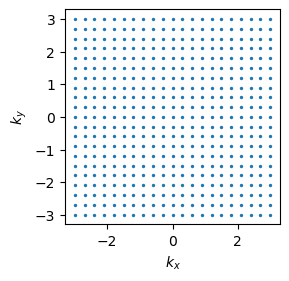

In [9]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [10]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [11]:
h_nonint = ham.generate_non_interacting()

In [12]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

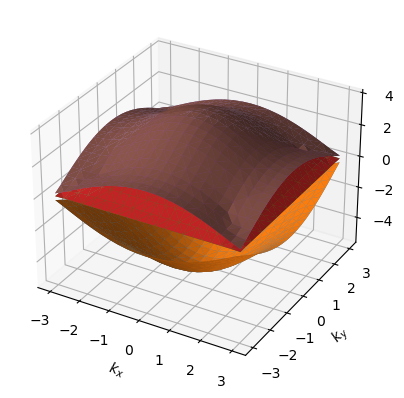

In [13]:
utils_auto.plot_2d_bandstructure(ham,en)

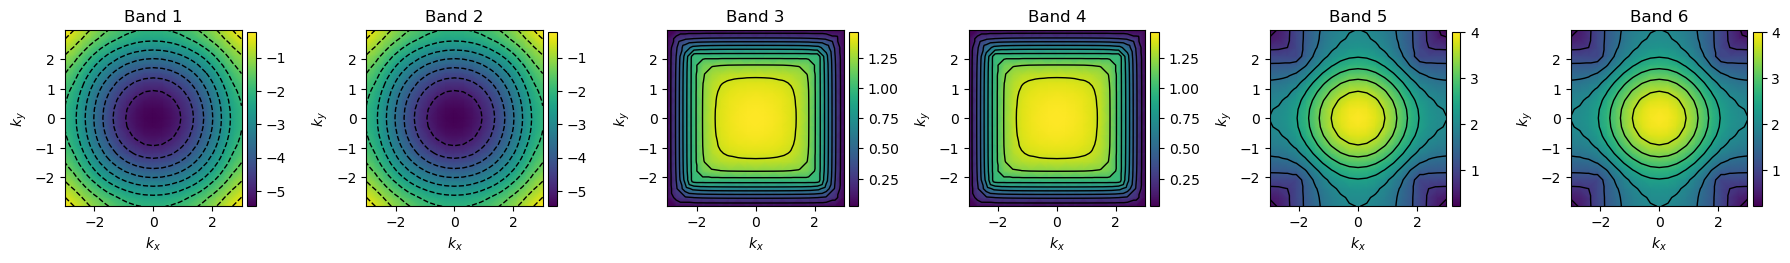

In [14]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [15]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [16]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [17]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


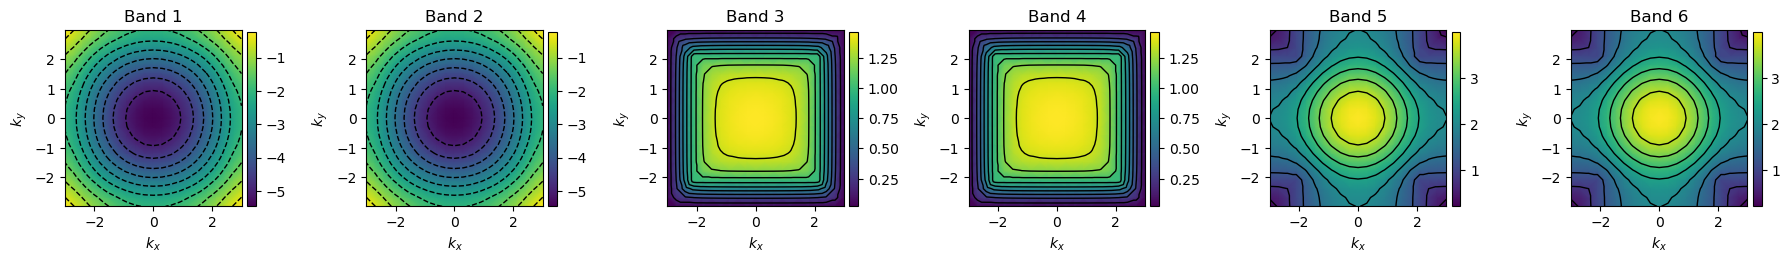

In [18]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [19]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [20]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [21]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

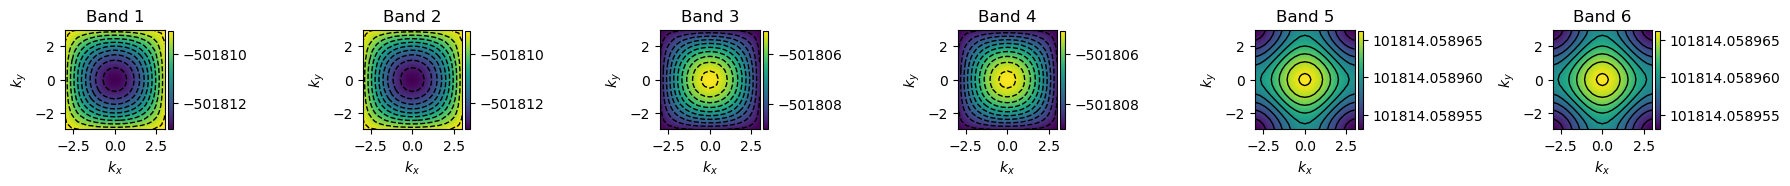

In [22]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [23]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.04
U/T is 79378.74
mean_U is 36805.46


# Auto eval

## Task 1

In [24]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I
I need to evaluate whether the image shows a proper momentum space mesh in the first Brillouin zone for the given Hamiltonian, and check if it has the correct point group symmetry. Let me break down the analysis:

**The Hamiltonian:**
This is a mean-field Hamiltonian for a three-band model on a square lattice, which includes oxygen p-orbitals (p_x and p_y) and copper d-orbitals. The model includes hopping between Cu-O (t_pd) and O-O (t_pp) sites, and various interaction terms (U_p, U_d, V_pp, V_pd). There's also a nematic order parameter η that breaks the symmetry between the x and y directions.

**The Image:**
The image shows a momentum space mesh in k-space. It appears to be a grid of evenly spaced points (blue dots) in a square region with k_x and k_y axes both ranging approximately from -3 to 3.

**Analysis Based on the Rubric:**

1. **Does it show a momentum space mesh in the first Brillouin zone?**
   - For a square lattice, 

In [25]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [26]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the
Let's analyze the band structure plots according to the rubric:

1. First, let's identify the shape of the Brillouin zone boundary:
   Looking at all the plots (Band 1 through Band 6), I can see that the Brillouin zone is shown as a square region with k_x and k_y coordinates ranging from approximately -3 to 3. This is consistent with what would be expected for a square lattice, which should have a square-shaped Brillouin zone. So, the shape of the Brillouin zone boundary matches what's expected for a square lattice.

2. Next, I need to examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Identify the highest energy regions (yellow):
   - In Band 1 and Band 2: The highest energy (yellow) regions are at the corners of the square.
   - In Band 3 and Band 4: The highest energy (yellow) regions are in the center and form roughly a square shape.
   - In Band 5 and Band 6: The highest ener

In [27]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [28]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu='1/3')
    )


#################### THINKING ####################

Alright,
Alright, I'm given an image showing band structures in the first Brillouin zone after a self-consistent Hartree-Fock calculation. I need to evaluate these against the rubric to determine if they're correct for the given Hamiltonian.

Let me go through the rubric points one by one:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, I can see 6 plots labeled "Band 1" through "Band 6". Each plot shows a square-shaped region with k_x and k_y axes ranging from approximately -3 to 3. This square shape is consistent with the Brillouin zone of a square lattice, which should indeed be square-shaped in k-space.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2: The highest energy (yellow) regions are at the edges of the plot, with lower

In [29]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [30]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper, nu='1/3',U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

In this problem,
In this problem, I'm looking at a set of band structure plots for a Hartree-Fock calculation of a specific condensed matter system. I need to analyze these plots based on the given rubric and determine if they correctly represent the expected band structure.

Let's systematically go through the rubric points:

### 1. Brillouin Zone Shape
The plots show a square Brillouin zone with k_x and k_y axes ranging from approximately -2.5 to 2.5. This is consistent with a square lattice, which should have a square Brillouin zone. The boundary appears to be square in all 6 band plots.

This point is correct.

### 2. Symmetry Analysis

#### 2.1 Highest Energy Regions
Looking at the color scale, the yellow regions represent the highest energy. In bands 1-4, the highest energy is at the center of the Brillouin zone. In bands 5-6, the highest energy appears to be at the center as well, but with a different color scale (noting the v

In [31]:
answer4=utils_auto.extract_result_content(result4['text'])

In [32]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
